In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.interpolation import shift

In [2]:
data = pd.read_excel('practice/2017_PRACTICE_IMPACT_MASTER.xlsx', sheet_name=0)

In [222]:
data = data.drop(columns = ['Unnamed: 8'])

KeyError: "['Unnamed: 8'] not found in axis"

In [4]:
practice_dates = data['date'].unique()
players = data['PLAYER NAME - CORRECTED'].unique()

In [183]:
practice_dates

array(['  09/26/2017', '  09/27/2017', '  10/03/2017', '  10/04/2017',
       '  10/05/2017', '  10/07/2017', '  10/10/2017', '  10/11/2017',
       '  10/12/2017', '  10/14/2017', '  10/17/2017', '  10/18/2017',
       '  10/19/2017', '  10/21/2017', '  10/24/2017', '  10/25/2017',
       '  10/26/2017', '  10/28/2017', '  10/31/2017', '  11/01/2017',
       '  11/02/2017', '  11/05/2017', '  11/07/2017', '  11/08/2017',
       '  11/10/2017', '  11/14/2017', '  11/17/2017', '  11/18/2017',
       '  11/20/2017', '  11/21/2017'], dtype=object)

In [184]:
players

array(['Sydney Wilson', 'Gabby Benda', 'Alessia Del Romano',
       'Nicole Alford', 'Cori Clifton', 'Grace Rigsbee', 'Ashley Askin',
       'Lauren Frerking', 'Kendall Wilson', 'Gabriela Stavnetchei',
       'Kodie Comby', 'Sam Knapp', 'Emily Becker', 'Simone Spencer'],
      dtype=object)

In [293]:
x = 'sydney wilson'
y = x.split(' ')
y[0] = y[0][0].upper() + y[0][1:]
y[1] = y[1][0].upper() + y[1][1:]

print(y)

['Sydney', 'Wilson']


In [7]:
sydney = data.loc[np.bitwise_and(data['date'] == '  09/26/2017',
                        data['PLAYER NAME - CORRECTED'] == 'Sydney Wilson')]

In [ ]:
%matplotlib inline

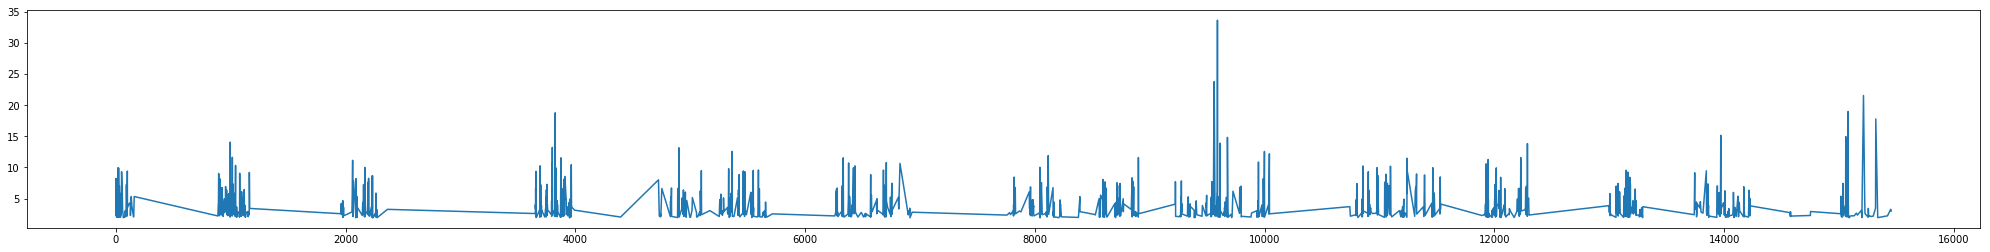

In [59]:
fig, ax = plt.subplots(1, figsize = (35, 4))
sydney['gforce (G)'].plot(ax = ax)

In [ ]:
sydney['diff'] = abs(sydney['gforce (G)'].shift(-1) - sydney['gforce (G)'])
sydney.dropna()

In [ ]:
sydney['datetime'] = sydney.apply(func = lambda x: x['time (s)'].split(' ')[0], axis = 1)
sydney['datetime'] = pd.to_datetime(sydney['datetime'], format='%H:%M:%S.%f')

In [ ]:
sydney['datetime_diff'] = abs(sydney['datetime'].shift(-1) - sydney['datetime'])
sydney.dropna()

In [ ]:
sydney['datetime_diff'][0]

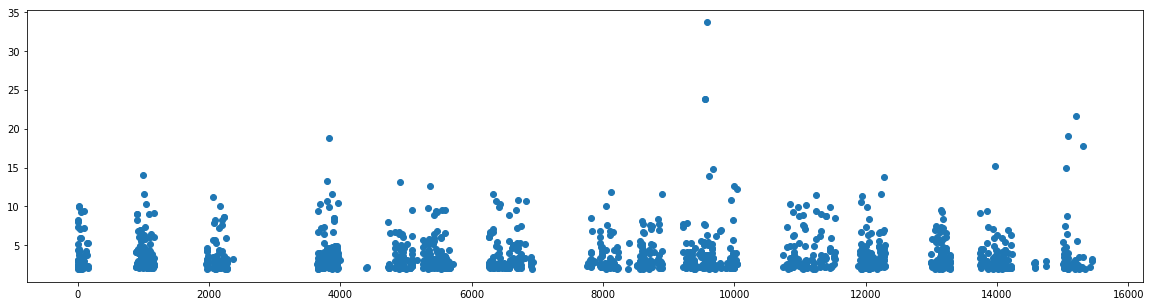

In [232]:
fig, ax = plt.subplots(1, figsize =  (20, 5))

plt.scatter(sydney.index, sydney['gforce (G)'])

from io import BytesIO
import base64

buf = BytesIO()
plt.savefig(buf, format='png')
def convertback(buffer):
    img_str = base64.b64encode(buffer.getvalue())
    return img_str.decode('utf-8')

returnval = convertback(buf)

In [235]:
i = np.array(sydney.index)

sydney['index_diff'] = i - shift(i, -1, cval=np.NaN)
sydney = sydney[0:-1]

In [236]:
sydney['stop'] = (sydney['index_diff'] <= -200)

In [249]:
(sydney['index_diff'] <= -200).value_counts()

False    1471
True       14
Name: index_diff, dtype: int64

Gforce avg for 1 jump: 3.708701
Max Gforce for 1 jump: 9.986491
******************
Gforce avg for 2 jump: 3.524912
Max Gforce for 2 jump: 11.153923
******************
Gforce avg for 3 jump: 3.943442
Max Gforce for 3 jump: 18.782438
******************
Gforce avg for 4 jump: 2.446080
Max Gforce for 4 jump: 3.144837
******************
Gforce avg for 5 jump: 3.617807
Max Gforce for 5 jump: 13.164725
******************
Gforce avg for 6 jump: 3.757897
Max Gforce for 6 jump: 11.552056
******************
Gforce avg for 7 jump: 3.626748
Max Gforce for 7 jump: 11.903782
******************
Gforce avg for 8 jump: 3.929898
Max Gforce for 8 jump: 33.657688
******************
Gforce avg for 9 jump: 3.908248
Max Gforce for 9 jump: 11.488255
******************
Gforce avg for 10 jump: 3.863866
Max Gforce for 10 jump: 13.843049
******************
Gforce avg for 11 jump: 3.559342
Max Gforce for 11 jump: 9.565041
******************
Gforce avg for 12 jump: 3.534439
Max Gforce for 12 jump: 15.173002
********

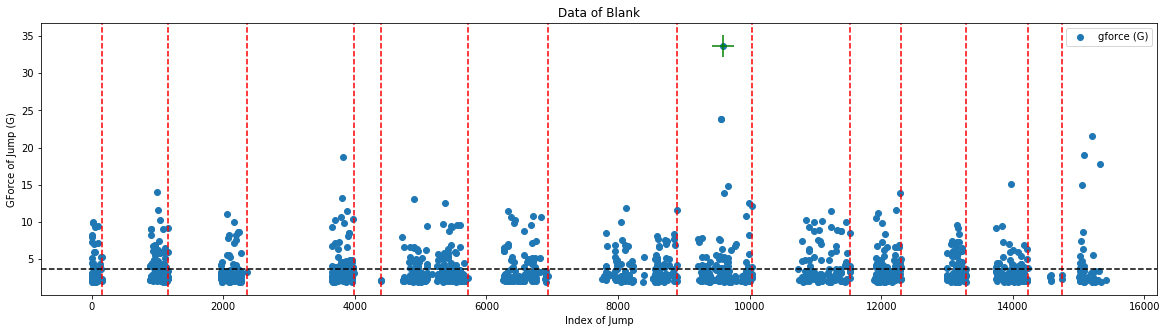

In [282]:
indeces = sydney[sydney['stop']].index

fig = plt.figure(figsize = (20,5))

plt.scatter(sydney.index, sydney['gforce (G)'])
for i in range(0, len(indeces)):
    partial = None
    if(i == 0):
        partial = sydney.loc[0:indeces[i]]
    elif(i == len(indeces) - 1):
        partial = sydney.loc[indeces[i]:]
    else:
        partial = sydney.loc[indeces[i]:indeces[i+1]]
    if(partial['gforce (G)'].max() > 27.39012432):
        plt.scatter(partial['gforce (G)'].idxmax(), partial['gforce (G)'].max(),  linewidths=100, marker = '+', color = 'green', s = 500)
    else:
        pass
    print('Gforce avg for %d jump: %f' % (i+1, partial['gforce (G)'].mean()))
    print('Max Gforce for %d jump: %f' % (i+1, partial['gforce (G)'].max()))
    print('******************')
    plt.axvline(indeces[i], linestyle = '--', color = 'r')

plt.axhline(sydney['gforce (G)'].mean(), linestyle = '--', color  = 'black')
plt.xlabel('Index of Jump')
plt.ylabel('GForce of Jump (G)')
plt.title('Data of Blank')
plt.legend()

from io import BytesIO
import base64

buf = BytesIO()
plt.savefig(buf, format='png')
def convertback(buffer):
    img_str = base64.b64encode(buffer.getvalue())
    return img_str.decode('utf-8')

returnval = convertback(buf)

print(returnval)

In [300]:
from collections import defaultdict

"""
x = np.array(max_vals)
x = x[~np.isnan(x)]
q99 = np.percentile(x, [99])
array([38.55761719])

"""
total_data = defaultdict(lambda : defaultdict(list))
max_vals = []
for player in players:
    print(practice + "*************************")
    for practice in practice_dates:
        current_player = data.loc[np.bitwise_and(data['date'] == practice,
                        data['PLAYER NAME - CORRECTED'] == player)]
        i = np.array(current_player.index)

        current_player['diff'] = abs(current_player['gforce (G)'].shift(-1) - current_player['gforce (G)'])
        sydney.dropna()
        current_player['index_diff'] = i - shift(i, -1, cval=np.NaN)
        current_player = current_player[0:-1]
        current_player['stop'] = (current_player['index_diff'] <= -350)

        l = {'bad_jump': 0, 'good_jump': 0}

        indeces = current_player[current_player['stop']].index
        for i in range(0, len(indeces)):
            partial = None
            if(i == 0):
                partial = current_player.loc[0:indeces[i]]
            elif(i == len(indeces) - 1):
                partial = current_player.loc[indeces[i]:]
            else:
                partial = current_player.loc[indeces[i]:indeces[i+1]]
            max_vals.append(partial['gforce (G)'].max())
            #l.append([current_player['gforce (G)'].mean(), current_player['gforce (G)'].max()])
            if(partial['gforce (G)'].max() > 27.39012432):
                l['bad_jump']+=1
            else:
                l['good_jump']+=1
        total_data[player][practice] = l
            #print('Max Slope for jump: %d ' % (partial['diff'].max()) )
            #print('Gforce avg for %d jump: %f' % (i+1, partial['gforce (G)'].mean()))
            #print('Max Gforce for %d jump: %f' % (i+1, partial['gforce (G)'].max()))
            #print('******************')
        #plt.plot(current_player['index_diff'])
        #plt.plot(current_player.index, current_player['gforce (G)'])
        #plt.scatter(current_player.index, current_player['gforce (G)'])

  11/21/2017*************************


/home/sachk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sachk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************
  11/21/2017*************************


In [301]:
total_data

defaultdict(<function __main__.<lambda>()>,
            {'Sydney Wilson': defaultdict(list,
                         {'  09/26/2017': {'bad_jump': 1, 'good_jump': 9},
                          '  09/27/2017': {'bad_jump': 0, 'good_jump': 5},
                          '  10/03/2017': {'bad_jump': 1, 'good_jump': 10},
                          '  10/04/2017': {'bad_jump': 0, 'good_jump': 14},
                          '  10/05/2017': {'bad_jump': 0, 'good_jump': 8},
                          '  10/07/2017': {'bad_jump': 0, 'good_jump': 11},
                          '  10/10/2017': {'bad_jump': 0, 'good_jump': 10},
                          '  10/11/2017': {'bad_jump': 0, 'good_jump': 10},
                          '  10/12/2017': {'bad_jump': 0, 'good_jump': 7},
                          '  10/14/2017': {'bad_jump': 1, 'good_jump': 4},
                          '  10/17/2017': {'bad_jump': 1, 'good_jump': 6},
                          '  10/18/2017': {'bad_jump': 0, 'good_jump': 12},
  

In [221]:
def getPlayerJumps(d, name):
    badJumpsMean = 0
    goodJumpsMean =0
    counter = 0
    for practices in d[name].keys():
        badJumpsMean += d[name][practices]['bad_jump']
        goodJumpsMean += d[name][practices]['good_jump']
        counter+=1
    return badJumpsMean, goodJumpsMean

In [302]:
def getPlayer(d):
    e = {}
    for name in d.keys():
        badJumpsMean = 0
        goodJumpsMean =0
        counter = 0
        for practices in d[name].keys():
            badJumpsMean += d[name][practices]['bad_jump']
            goodJumpsMean += d[name][practices]['good_jump']
            counter+=1
        e[name] = (badJumpsMean, goodJumpsMean)
    return e

Text(0, 0.5, 'Frequency')

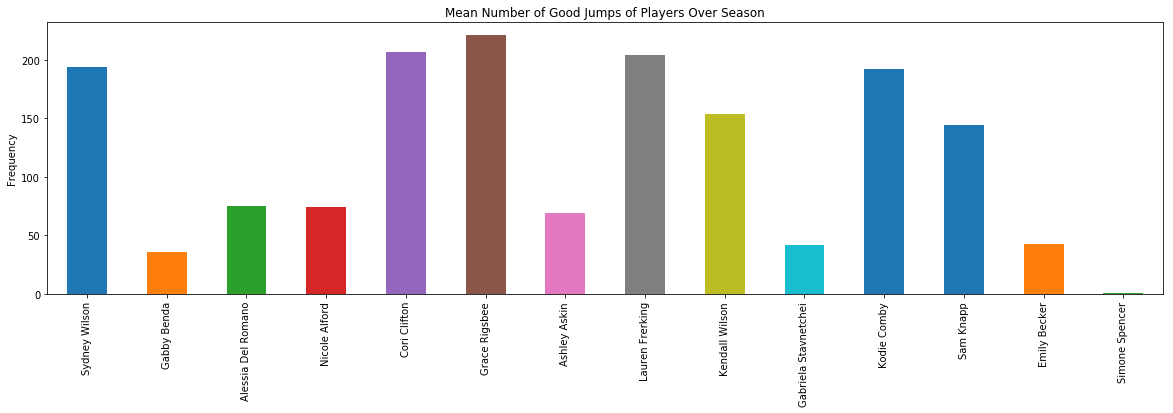

In [360]:
output = getPlayer(total_data)
df = pd.DataFrame(output)
df = df.T
df.columns = ['BadJumps', 'GoodJumps']

fig, ax = plt.subplots(figsize = (20, 5))
df['GoodJumps'].plot.bar(ax = ax)
ax.set_title("Mean Number of Good Jumps of Players Over Season")
ax.set_ylabel('Frequency')

[27.39012432]


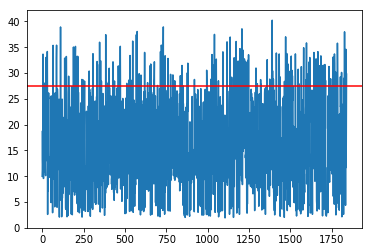

In [171]:
x = np.array(max_vals)
x = x[~np.isnan(x)]
q = np.percentile(x, [90])
plt.plot(x)
plt.axhline(y=q, color='r', linestyle='-')
print(q)

/home/sachk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sachk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Max Slope for jump: 7 
Gforce avg for 1 jump: 2.985853
Max Gforce for 1 jump: 9.698454
******************
Max Slope for jump: 21 
Gforce avg for 2 jump: 3.091039
Max Gforce for 2 jump: 23.944937
******************
Max Slope for jump: 23 
Gforce avg for 3 jump: 3.276436
Max Gforce for 3 jump: 26.491320
******************
Max Slope for jump: 0 
Gforce avg for 4 jump: 2.409602
Max Gforce for 4 jump: 2.632489
******************
Max Slope for jump: 10 
Gforce avg for 5 jump: 3.234602
Max Gforce for 5 jump: 12.248265
******************
Max Slope for jump: 1 
Gforce avg for 6 jump: 2.676678
Max Gforce for 6 jump: 3.734970
******************
Max Slope for jump: 18 
Gforce avg for 7 jump: 3.207013
Max Gforce for 7 jump: 25.972679
******************


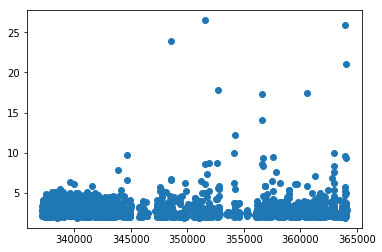

In [160]:
person('  10/25/2017', 'Sam Knapp')

In [161]:
def person(practice, player):
    current_player = data.loc[np.bitwise_and(data['date'] == practice,
                        data['PLAYER NAME - CORRECTED'] == player)]
    i = np.array(current_player.index)
    
    current_player['diff'] = abs(current_player['gforce (G)'].shift(-1) - current_player['gforce (G)'])
    sydney.dropna()
    current_player['index_diff'] = i - shift(i, -1, cval=np.NaN)
    current_player = current_player[0:-1]
    current_player['stop'] = (current_player['index_diff'] <= -350)
    
    l = {'bad_jump': 0, 'good_jump': 0}

    indeces = current_player[current_player['stop']].index
    for i in range(0, len(indeces)):
        partial = None
        if(i == 0):
            partial = current_player.loc[0:indeces[i]]
        elif(i == len(indeces) - 1):
            partial = current_player.loc[indeces[i]:]
        else:
            partial = current_player.loc[indeces[i]:indeces[i+1]]
        #max_vals.append(current_player['gforce (G)'].max())
        #l.append([current_player['gforce (G)'].mean(), current_player['gforce (G)'].max()])
        if(current_player['gforce (G)'].max() > 28):
            l['bad_jump']+=1
        else:
            l['good_jump']+=1
        print('Max Slope for jump: %d ' % (partial['diff'].max()) )
        print('Gforce avg for %d jump: %f' % (i+1, partial['gforce (G)'].mean()))
        print('Max Gforce for %d jump: %f' % (i+1, partial['gforce (G)'].max()))
        print('******************')
    return 
    #plt.plot(current_player['index_diff'])
    #plt.plot(current_player.index, current_player['gforce (G)'])
    #plt.scatter(current_player.index, current_player['gforce (G)'])

In [443]:
games = pd.read_excel('games/gt-volleyball-game-data.xlsx', sheet_name =0).dropna()
games

,UNIQUE_ID,DATE,PLAYER ##,GAME_ID,OPPONENT,Player Name,Team Rank,Load Sum,Movements,Movement Category,...,High Surges Per Minute,Kinetic Energy (Joules/Pound),Avg Intensity (Watts/Pound),Avg Burst (Feet/Sec),Jumps,Avg Jump (Inches),High Jumps (20+ Inches),Avg High Jumps (20+ Inches),Highest Jump (inches),Point Differential
0,101211.0,2017-10-01,11.0,1012.0,North Carolina,Gabriela Stavnetchei,1.0,537.0,3980.0,2.0,...,4.46,4592.89,32.80,1.69,107.0,18.90,55.0,23.27,44.94,2
1,101233.0,2017-10-01,33.0,1012.0,North Carolina,Ashley Askin,2.0,528.0,3853.0,2.0,...,4.88,3981.07,27.83,1.76,88.0,15.04,14.0,22.54,25.03,2
2,10121.0,2017-10-01,1.0,1012.0,North Carolina,Kodie Comby,3.0,475.0,2729.0,2.0,...,4.76,2891.47,29.20,1.73,132.0,16.21,20.0,21.33,23.61,2
3,101297.0,2017-10-01,97.0,1012.0,North Carolina,Grace Rigsbee,4.0,402.0,2396.0,2.0,...,4.04,2103.53,19.84,1.57,72.0,15.02,12.0,22.63,25.56,2
4,10129.0,2017-10-01,9.0,1012.0,North Carolina,Gabby Benda,4.0,402.0,2870.0,2.0,...,7.94,1867.09,16.97,1.35,76.0,10.88,0.0,0.00,14.99,2
5,101214.0,2017-10-01,14.0,1012.0,North Carolina,Cori Clifton,6.0,382.0,2390.0,2.0,...,3.70,2305.34,22.60,1.54,63.0,18.92,15.0,22.40,24.90,2
6,10124.0,2017-10-01,4.0,1012.0,North Carolina,Sydney Wilson,7.0,334.0,1825.0,2.0,...,2.88,1624.14,16.40,1.55,87.0,18.45,35.0,22.72,27.41,2
7,101212.0,2017-10-01,12.0,1012.0,North Carolina,Nicole Alford,8.0,286.0,2032.0,2.0,...,3.10,1430.78,14.45,1.42,73.0,13.03,2.0,21.06,21.48,2
8,10128.0,2017-10-01,8.0,1012.0,North Carolina,Sam Knapp,9.0,185.0,2045.0,2.0,...,1.15,1176.74,10.14,1.39,44.0,10.73,0.0,0.00,16.05,2
9,101223.0,2017-10-01,23.0,1012.0,North Carolina,Alessia Del Romano,10.0,156.0,357.0,0.0,...,0.93,251.78,5.85,1.19,13.0,10.29,1.0,20.91,20.91,2


In [454]:
x = games.loc[:, "Movements":"Point Differential"].values
y = games.loc[:, 'Point Differential'].values

In [455]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, svd_solver='full')
pca.fit(x, y)                 
PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
svd_solver='full', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)

[0.9645569]


In [457]:
reduced = pca.fit_transform(x,y)

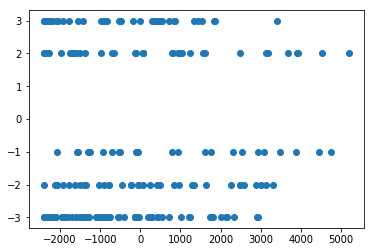

In [458]:
plt.scatter(reduced, y)

In [372]:
games.keys()

Index(['UNIQUE_ID', 'DATE', 'PLAYER ##', 'GAME_ID', 'OPPONENT',
       '    Player Name', 'Team Rank', 'Load Sum', 'Movements',
       'Movement Category', 'High Surges', 'Surge Category',
       'Stress Percentage', 'Stress Category', 'Active Minutes',
       'Movements Per Minute', 'High Surges Per Minute',
       'Kinetic Energy (Joules/Pound)', 'Avg Intensity (Watts/Pound)',
       'Avg Burst (Feet/Sec)', 'Jumps', 'Avg Jump (Inches)',
       'High Jumps (20+ Inches)', 'Avg High Jumps (20+ Inches)',
       'Highest Jump (inches)'],
      dtype='object')

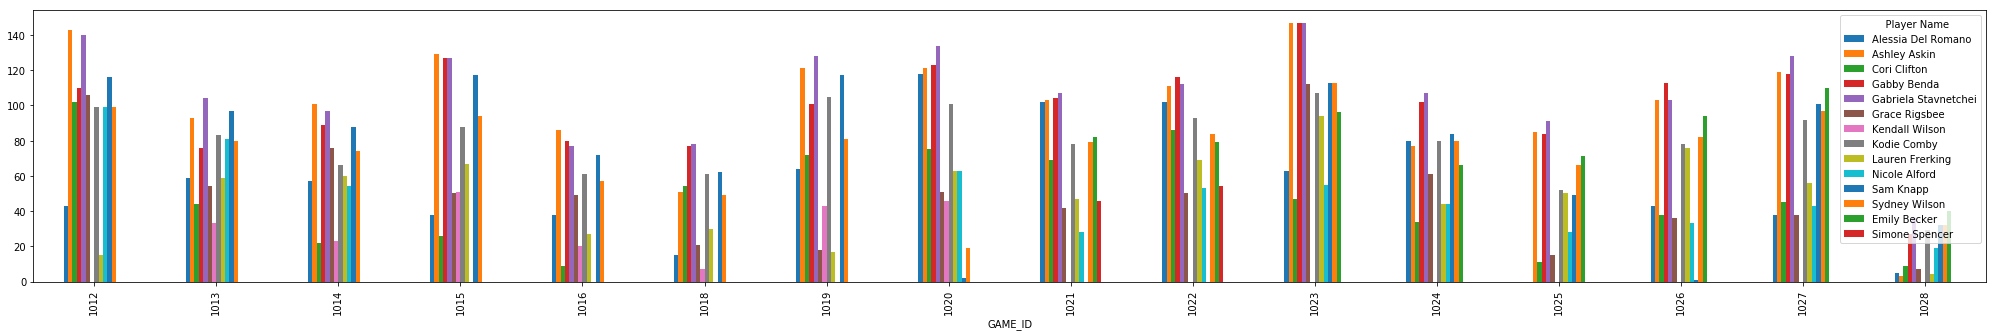

In [386]:
fig, ax = plt.subplots(figsize = (35,5))

games.groupby(by = ['GAME_ID', '    Player Name']).mean()['Active Minutes'].unstack().plot(kind='bar', ax = ax)

In [401]:
games.groupby(by= ['GAME_ID']).mean().dropna()

,Team Rank,Load Sum,Movements,Movement Category,High Surges,Surge Category,Stress Percentage,Stress Category,Active Minutes,Movements Per Minute,High Surges Per Minute,Kinetic Energy (Joules/Pound),Avg Intensity (Watts/Pound),Avg Burst (Feet/Sec),Jumps,Avg Jump (Inches),High Jumps (20+ Inches),Avg High Jumps (20+ Inches),Highest Jump (inches)
GAME_ID,,,,,,,,,,,,,,,,,,,
1012,6.416667,320.500000,2053.000000,1.500000,355.250000,1.083333,14.645833,0.416667,89.333333,19.209167,3.258333,1852.537500,16.370833,1.286667,62.916667,12.289167,12.833333,14.738333,20.406667
1013,6.500000,320.666667,1725.583333,1.333333,290.750000,0.750000,16.294167,0.583333,71.916667,22.765000,3.815833,1485.505833,18.865000,1.431667,54.500000,14.223333,11.416667,16.609167,21.746667
1014,6.500000,315.916667,1573.666667,1.166667,289.250000,0.750000,17.609167,0.833333,67.250000,21.021667,3.748333,1502.359167,19.962500,1.517500,51.250000,14.018333,8.916667,11.049167,20.067500
1015,6.500000,319.000000,2110.666667,1.166667,399.833333,0.833333,15.435000,0.750000,76.166667,22.641667,4.010833,2054.830000,21.800000,1.488333,64.500000,13.464167,11.166667,12.823333,19.259167
1016,6.500000,315.750000,1262.666667,0.916667,251.333333,0.750000,13.469167,0.500000,48.000000,20.826667,3.705833,1159.735833,18.195833,1.382500,36.916667,11.641667,7.166667,10.777500,16.217500
1018,6.500000,314.750000,1100.083333,0.916667,210.333333,0.583333,13.244167,0.416667,42.083333,19.332500,3.408333,1030.423333,17.792500,1.371667,34.833333,11.297500,7.333333,11.035833,16.660000
1019,6.500000,320.333333,1841.666667,1.166667,351.333333,0.916667,16.350833,0.583333,72.250000,21.413333,4.065000,1575.771667,15.710833,1.076667,47.000000,14.483333,12.500000,15.971667,21.277500
1020,6.500000,323.500000,1859.916667,1.083333,359.333333,0.833333,18.773333,1.000000,76.333333,21.961667,4.270000,1787.884167,21.149167,1.515000,66.166667,16.464167,12.916667,20.512500,24.951667
1021,6.500000,323.250000,1887.750000,1.250000,360.166667,0.916667,17.729167,0.833333,73.916667,23.298333,4.350833,1702.348333,20.648333,1.435000,56.250000,16.514167,15.416667,16.649167,22.422500


In [402]:
new_games = games.set_index(['    Player Name', 'GAME_ID']).dropna()
new_games.loc['Gabriela Stavnetchei']['Movements'].mean()

3185.9375